# Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   # библиотека построения графиков 
import seaborn as sns             # библиотека визуализации статистики, высокоуровневая, на основе matplotlib

In [2]:
df = pd.read_csv("real_estate_data.csv", sep=',', low_memory=False)

In [3]:
df.info() # список столбцов с указанием типа даных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403487 entries, 0 to 403486
Data columns (total 17 columns):
id                   403487 non-null int64
type                 403487 non-null object
sub_type             403487 non-null object
start_date           403487 non-null object
end_date             266298 non-null object
listing_type         403487 non-null int64
tom                  403487 non-null int64
building_age         376097 non-null object
total_floor_count    375466 non-null object
floor_no             368191 non-null object
room_count           403487 non-null object
size                 257481 non-null float64
address              403487 non-null object
furnished            0 non-null float64
heating_type         375517 non-null object
price                402772 non-null float64
price_currency       402772 non-null object
dtypes: float64(3), int64(3), object(11)
memory usage: 35.4+ MB


In [4]:
# первые строки из набора
df.head()

,id,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,furnished,heating_type,price,price_currency
0,1,Konut,Rezidans,12/10/18,1/9/19,2,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,3500.0,TRY
1,2,Konut,Daire,2/13/19,NaN,1,14,0,20 ve üzeri,20 ve üzeri,1+0,43.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,490000.0,TRY
2,3,Konut,Daire,10/9/18,11/8/18,1,30,0,1,Yüksek Giriş,2+1,NaN,Tekirdağ/Çorlu/Reşadiye,NaN,Fancoil,155000.0,TRY
3,4,Konut,Rezidans,9/10/18,10/10/18,1,30,3,20 ve üzeri,20 ve üzeri,6+1,450.0,İstanbul/Beşiktaş/Levent,NaN,Fancoil,32500000.0,TRY
4,5,Konut,Rezidans,12/10/18,1/9/19,1,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,1450000.0,TRY


In [5]:
# размер датасета
df.shape

(403487, 17)

In [6]:
# список колонок
df.columns

Index(['id', 'type', 'sub_type', 'start_date', 'end_date', 'listing_type',
       'tom', 'building_age', 'total_floor_count', 'floor_no', 'room_count',
       'size', 'address', 'furnished', 'heating_type', 'price',
       'price_currency'],
      dtype='object')

In [7]:
df.describe().T 
# транспонированная матрица статистичесикх характеристик

,count,mean,std,min,25%,50%,75%,max
id,403487.0,201744.000000,1.164768e+05,1.0,100872.5,201744.0,302615.5,4.034870e+05
listing_type,403487.0,1.294235,4.677333e-01,1.0,1.0,1.0,2.0,3.000000e+00
tom,403487.0,57.022739,4.435893e+01,0.0,29.0,40.0,90.0,1.800000e+02
size,257481.0,279.349094,9.429195e+03,1.0,85.0,110.0,140.0,9.482350e+05
furnished,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,402772.0,354641.661933,4.809503e+06,-250.0,2500.0,199000.0,342000.0,2.000000e+09


## анализ пустых значений

In [8]:
print(df.isna().sum()) # вывод количества неизвестных значений (NaN) в столбцах
print(df.isna().sum() / len(df) * 100) # процент пропущенных значений в колонках

id                        0
type                      0
sub_type                  0
start_date                0
end_date             137189
listing_type              0
tom                       0
building_age          27390
total_floor_count     28021
floor_no              35296
room_count                0
size                 146006
address                   0
furnished            403487
heating_type          27970
price                   715
price_currency          715
dtype: int64
id                     0.000000
type                   0.000000
sub_type               0.000000
start_date             0.000000
end_date              34.000848
listing_type           0.000000
tom                    0.000000
building_age           6.788323
total_floor_count      6.944709
floor_no               8.747742
room_count             0.000000
size                  36.186048
address                0.000000
furnished            100.000000
heating_type           6.932070
price                  0.177205

## Выводы
- колонка furnished содержит все значения Nan - удаляем, неинформативная
- колонка end_date = NaN - срок активности на рынке не окончен - нормально
- колонка size - 36% пропусков подумаем, что делать

### Удаляем колонку furnished

In [9]:
df = df.drop(columns = "furnished")

### поиск дубликатов строк

In [10]:
print(df.shape, df.drop_duplicates().shape)

(403487, 16) (403487, 16)


дубликатов - нет, все хорошо

## Анализ значений по колонкам

### колонка type¶

In [11]:
# разнообразные значения
df["type"].unique()

array(['Konut'], dtype=object)

Konut = Housing - строения

### колонка sub_type 

In [12]:
df["sub_type"].unique()

array(['Rezidans', 'Daire', 'Villa', 'Müstakil Ev', 'Kooperatif',
       'Yazlık', 'Komple Bina', 'Prefabrik Ev', 'Köşk / Konak / Yalı',
       'Çiftlik Evi', 'Yalı Dairesi', 'Loft'], dtype=object)

In [13]:
df["sub_type"].value_counts()

Daire                  354549
Villa                   21324
Müstakil Ev              9563
Rezidans                 7716
Yazlık                   5929
Komple Bina              2607
Prefabrik Ev              679
Çiftlik Evi               528
Köşk / Konak / Yalı       301
Yalı Dairesi              187
Kooperatif                 70
Loft                       34
Name: sub_type, dtype: int64

кодировка понятна только для первого значения "Daire = Flat"

### колонка listing_type 

In [14]:
# разнообразные значения
df["listing_type"].unique()

array([2, 1, 3], dtype=int64)

закодирована не как в описании -  Satılık = Sale, Kiralık = Rent
Будем разбираться

In [15]:
df["listing_type"].value_counts()

1    287009
2    114236
3      2242
Name: listing_type, dtype: int64

### колонка tom - время на рынке

In [16]:
df["tom"].value_counts()

30     82216
60     22325
0      11151
90      9868
61      6738
1       4855
120     4504
91      4333
62      4292
2       4255
7       4083
6       3894
5       3811
14      3762
4       3741
8       3730
21      3692
9       3655
13      3642
15      3357
12      3258
92      3235
63      3215
3       3004
11      2926
20      2914
22      2886
27      2875
19      2875
16      2862
       ...  
149      700
159      687
160      679
144      671
166      657
162      641
108      637
167      637
129      612
174      597
168      585
175      565
163      565
170      530
176      521
115      521
165      501
173      496
158      494
169      468
172      465
177      464
180      457
136      422
179      379
143      313
157      287
164      210
178      196
171      158
Name: tom, Length: 181, dtype: int64

 скорее всего дни

### колонка building_age - возраст здания

“arası” means between

In [17]:
df["building_age"].value_counts()

0              140174
6-10 arası      50495
11-15 arası     32309
16-20 arası     31333
1               20355
4               19032
21-25 arası     18438
2               17466
3               15651
5               13589
26-30 arası     10581
31-35 arası      4268
36-40 arası      1347
40 ve üzeri      1059
Name: building_age, dtype: int64

категориальная переменная - порядковая, надо перевести в отдельную нумерацию, если использовать далее

In [18]:
# словарь перевода - заменяем интервал на середину (6-10 -> 8, ...)
# первый интервал - 1-5 заменим на середину - 3
d = {'0': 0, '1': 3, '2': 3, '3': 3, '4': 3, '5': 3, '6-10 arası': 8, '11-15 arası': 13, '16-20 arası': 18, '21-25 arası': 23, '26-30 arası':28, '31-35 arası': 33, 
     '36-40 arası': 38, '40 ve üzeri': 50}
df['building_age'] = df['building_age'].map(d)
df['building_age'].value_counts()

0.0     140174
3.0      86093
8.0      50495
13.0     32309
18.0     31333
23.0     18438
28.0     10581
33.0      4268
38.0      1347
50.0      1059
Name: building_age, dtype: int64

### колонка total_floor_count число этажей в здании

In [19]:
df["total_floor_count"].value_counts()

4              83082
3              77956
5              70104
10-20 arası    36512
2              27742
6              23348
10             12558
7              12284
8              11207
9               9029
20 ve üzeri     6679
1               4965
Name: total_floor_count, dtype: int64

категориальная переменная - порядковая, надо перевести в отдельную нумерацию, если использовать далее

In [20]:
df["total_floor_count"].unique()

array(['20 ve üzeri', '1', '10-20 arası', '4', '2', '3', '8', '7', '6',
       '5', '10', nan, '9'], dtype=object)

In [21]:
# словарь перевода - заменяем интервал на середину (6-10 -> 8, ...)
d = {'1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10':10, '10-20 arası': 15, 
     '20 ve üzeri': 25}
df['total_floor_count'] = df['total_floor_count'].map(d)
df['total_floor_count'].value_counts()

4.0     83082
3.0     77956
5.0     70104
15.0    36512
2.0     27742
6.0     23348
10.0    12558
7.0     12284
8.0     11207
9.0      9029
25.0     6679
1.0      4965
Name: total_floor_count, dtype: int64

### колонка floor_no номер этажа для квартир

In [22]:
df["floor_no"].value_counts()

2               65864
3               52690
1               46756
4               34465
Yüksek Giriş    24045
5               21193
Müstakil        21165
Bahçe katı      19065
Giriş Katı      10431
6                9747
7                7698
8                6099
Kot 1            5036
Kot 2            4987
9                4855
10               3863
Kot 3            3793
Çatı Katı        3566
Zemin Kat        3441
Komple           2958
11               2894
12               2309
Kot 4            2269
13               1702
20 ve üzeri      1563
14               1328
15                911
En Üst Kat        894
Bodrum Kat        815
16                600
17                373
18                334
Teras Kat         293
19                177
Asma Kat           12
Name: floor_no, dtype: int64

In [23]:
# словарь перекодировки по данным описания
d = {'Yüksek Giriş':'1st floor', 'Giriş Katı': 'ground floor', 
     'Kot 1':'ground floor', 'Kot 2':'ground floor', 'Kot 3':'ground floor', 'Kot 4':'ground floor', 
     'Zemin Kat': 'ground floor', 'En Üst Kat':'ground floor', 'Bodrum Kat':'ground floor', 'Teras Kat':'ground floor',
     'Asma Kat':'ground floor',
     'Çatı Katı': 'penthouse apartment', 'Bahçe katı': 'garden floor flat',
     '20 ve üzeri': 20,
     '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10':10,
     '11': 11, '12': 12, '13': 13, '14': 14, '15': 15, '16': 16, '17': 17, '18': 18, '19': 19}
df['floor_no'] =df['floor_no'].map(d)
df['floor_no'].value_counts()

2                      65864
3                      52690
1                      46756
4                      34465
ground floor           31971
1st floor              24045
5                      21193
garden floor flat      19065
6                       9747
7                       7698
8                       6099
9                       4855
10                      3863
penthouse apartment     3566
11                      2894
12                      2309
13                      1702
20                      1563
14                      1328
15                       911
16                       600
17                       373
18                       334
19                       177
Name: floor_no, dtype: int64

### колонка heating_type

In [24]:
df["heating_type"].value_counts()

Kombi (Doğalgaz)                   204150
Klima                               68197
Merkezi Sistem (Isı Payı Ölçer)     30595
Merkezi Sistem                      22855
Kalorifer (Doğalgaz)                10928
Soba (Kömür)                         8450
Yerden Isıtma                        6958
Yok                                  6098
Kat Kaloriferi                       5655
Kombi (Elektrikli)                   3449
Soba (Doğalgaz)                      2602
Güneş Enerjisi                       1754
Kalorifer (Kömür)                    1503
Jeotermal                            1418
Fancoil                               495
Kalorifer (Akaryakıt)                 410
Name: heating_type, dtype: int64

категориальная переменная - надо перекодировать в соответствии с описанием

-	Kalorifer (Doğalgaz) = central heating/natural gas, 
-	Kalorifer (Kömür) = central heating/coal, 
-	Kombi (Elektrikli) = combi boiler 
-	Klima = air-conditioning 
-	Kombi (Doğalgaz) = gas-combi boiler
-	Merkezi Sistem = central heating 
-	Merkezi Sistem (Isı Payı Ölçer) =central heating
-	Yerden Isıtma = floor heating
-	Soba (Kömür) = heating stove/coal,
-	Soba (Doğalgaz) = heating stove/natural gas
-	Güneş Enerjisi = solar energy,
-	Jeotermal = geothermal energy
-	Fancoil = a type of air conditioner
-	Kat Kaloriferi = central heating
-	Kalorifer (Akaryakıt) = central heating/fuel oil
-	Yok = None

In [25]:
# словарь перекодировки по данным описания
d = {'Kombi (Doğalgaz)': 'gas-combi boiler', 'Klima': 'air-conditioning', 
     'Merkezi Sistem (Isı Payı Ölçer)': 'central heating', 'Merkezi Sistem': 'central heating', 
     'Kalorifer (Doğalgaz)': 'central heating/natural gas', 'Soba (Kömür)': 'heating stove/coal', 
     'Yerden Isıtma': 'floor heating', 'Yok': 'None', 'Kat Kaloriferi': 'central heating', 'Kombi (Elektrikli)': 'combi boiler',
     'Soba (Doğalgaz)': 'heating stove/natural gas', 'Güneş Enerjisi': 'solar energy', 
     'Kalorifer (Kömür)': 'central heating/coal', 'Jeotermal': 'geothermal energy', 'Fancoil': 'air conditioner',
     'Kalorifer (Akaryakıt)': 'central heating/fuel oil'}
df['heating_type'] =df['heating_type'].map(d)
df['heating_type'].value_counts()

gas-combi boiler               204150
air-conditioning                68197
central heating                 59105
central heating/natural gas     10928
heating stove/coal               8450
floor heating                    6958
None                             6098
combi boiler                     3449
heating stove/natural gas        2602
solar energy                     1754
central heating/coal             1503
geothermal energy                1418
air conditioner                   495
central heating/fuel oil          410
Name: heating_type, dtype: int64

# Сессия 2 

## Отбор признаков

In [26]:
# Сначала узнаем число срок, где возраст здания = Nan
df["building_age"].isna().sum()


27390

In [27]:
# подклбчение доп. графических библиотек
from IPython.core.pylabtools import figsize
sns.set(font_scale = 2)
from sklearn.model_selection import train_test_split

In [28]:
df["building_age"].value_counts()

0.0     140174
3.0      86093
8.0      50495
13.0     32309
18.0     31333
23.0     18438
28.0     10581
33.0      4268
38.0      1347
50.0      1059
Name: building_age, dtype: int64

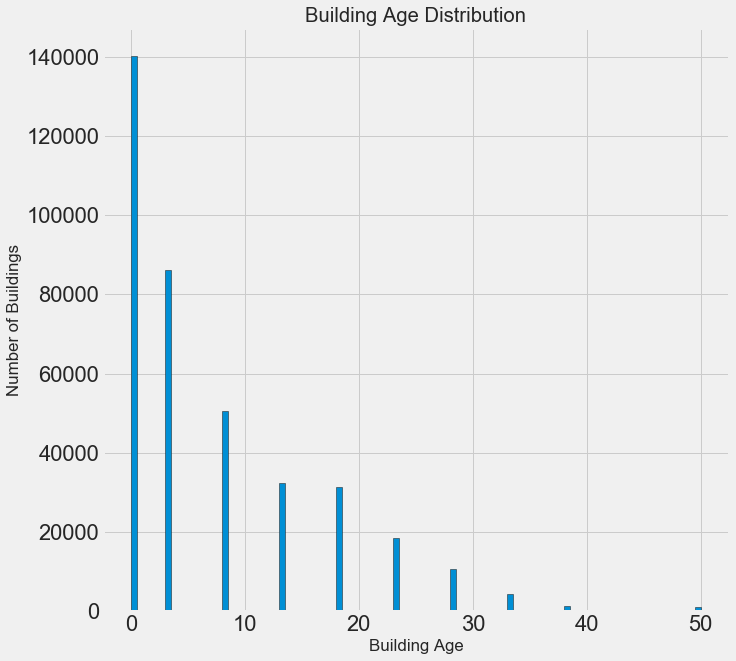

In [29]:
figsize(10, 10)


# Распределение building_age
plt.style.use('fivethirtyeight')
plt.hist(df['building_age'].dropna(), bins =100, edgecolor = 'k');
plt.xlabel('Building Age'); plt.ylabel('Number of Buildings'); 
plt.title('Building Age Distribution');


видим что много новостроек - возраст = 0, остальных количество плавно убывает 

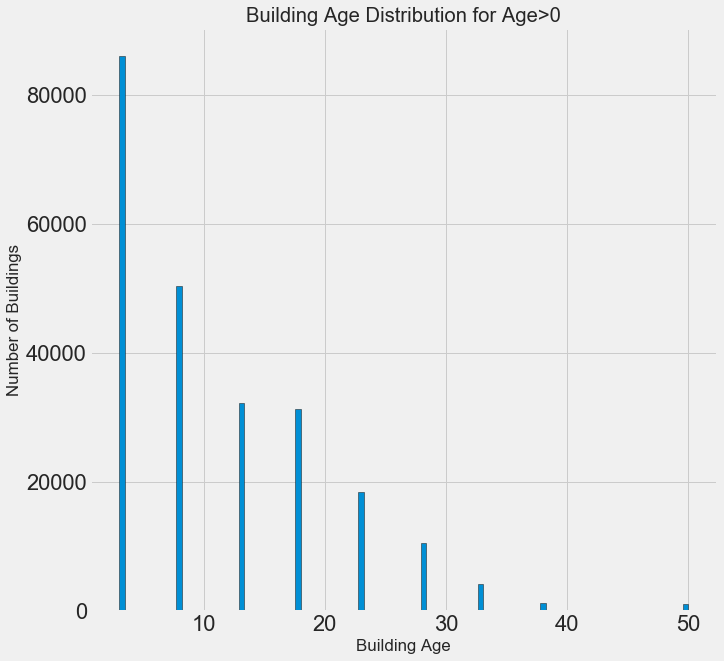

In [30]:
figsize(10, 10)


# Распределение building_age, если не брать новостройки
plt.style.use('fivethirtyeight')
plt.hist(df[df['building_age'] > 0]['building_age'].dropna(), bins =100, edgecolor = 'k');
plt.xlabel('Building Age'); plt.ylabel('Number of Buildings'); 
plt.title('Building Age Distribution for Age>0');

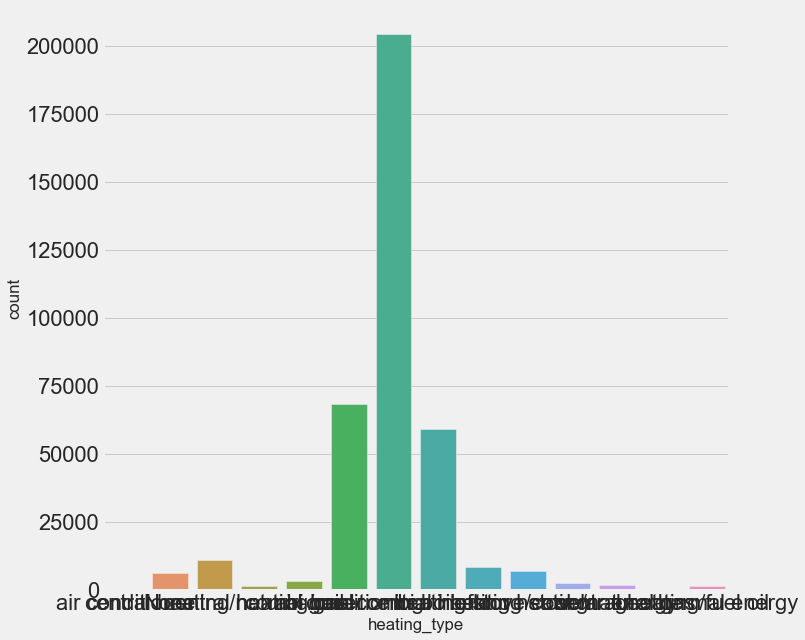

In [31]:
### построим графики гистограмм
sns.countplot(df["heating_type"])

In [137]:
df["heating_type"].value_counts()

gas-combi boiler               204150
air-conditioning                68197
central heating                 59105
central heating/natural gas     10928
heating stove/coal               8450
floor heating                    6958
None                             6098
combi boiler                     3449
heating stove/natural gas        2602
solar energy                     1754
central heating/coal             1503
geothermal energy                1418
air conditioner                   495
central heating/fuel oil          410
Name: heating_type, dtype: int64

### посмотрим зависимости building_age от числовых признаков

In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,403487.0,201744.000000,1.164768e+05,1.0,100872.5,201744.0,302615.5,4.034870e+05
listing_type,403487.0,1.294235,4.677333e-01,1.0,1.0,1.0,2.0,3.000000e+00
tom,403487.0,57.022739,4.435893e+01,0.0,29.0,40.0,90.0,1.800000e+02
building_age,376097.0,6.943879,8.746804e+00,0.0,0.0,3.0,13.0,5.000000e+01
total_floor_count,375466.0,5.897719,4.432264e+00,1.0,3.0,4.0,6.0,2.500000e+01
size,257481.0,279.349094,9.429195e+03,1.0,85.0,110.0,140.0,9.482350e+05
price,402772.0,354641.661933,4.809503e+06,-250.0,2500.0,199000.0,342000.0,2.000000e+09


In [33]:
df.corr()

,id,listing_type,tom,building_age,total_floor_count,size,price
id,1.000000,0.033796,-0.003890,-0.003405,0.168879,0.008551,-0.001938
listing_type,0.033796,1.000000,-0.126534,0.175749,0.082590,-0.010385,-0.044270
tom,-0.003890,-0.126534,1.000000,-0.020789,-0.015280,-0.011847,0.011818
building_age,-0.003405,0.175749,-0.020789,1.000000,-0.114209,0.011994,0.016409
total_floor_count,0.168879,0.082590,-0.015280,-0.114209,1.000000,0.000153,0.000802
size,0.008551,-0.010385,-0.011847,0.011994,0.000153,1.000000,0.005889
price,-0.001938,-0.044270,0.011818,0.016409,0.000802,0.005889,1.000000


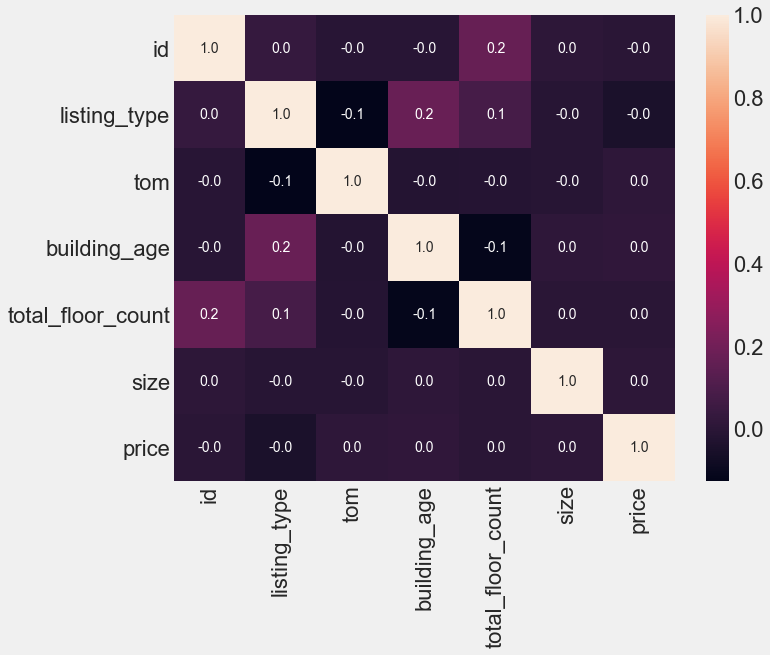

In [34]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot = True, fmt = ".01f")

Для признака  building_age - числовые признаки мало связаны 
Наибольший по модулю коэффициент корреляции - 0.2 для признака listing_type (какая операция сней производится, но кодировка не известная - она не совпадает с заявленной в описании)

## Отбор признаков
На возраст здания должны влиять признаки:
    - start_date - дата нвыставления на рынок (чем больше, тем старше дом)
    - tom - время на рынке - чем больше, тем выше шансы, что дом старше
    - heating_type - тип отопления
    - address - наверное, есть районы старой застройки
Только эти признаки и имеет смысл рассматривать для обучения    

In [35]:
# уберем строки где building_age = NaN
df1 = df[df["building_age"].isnull() == False]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376097 entries, 0 to 403325
Data columns (total 16 columns):
id                   376097 non-null int64
type                 376097 non-null object
sub_type             376097 non-null object
start_date           376097 non-null object
end_date             250047 non-null object
listing_type         376097 non-null int64
tom                  376097 non-null int64
building_age         376097 non-null float64
total_floor_count    369204 non-null float64
floor_no             338034 non-null object
room_count           376097 non-null object
size                 244351 non-null float64
address              376097 non-null object
heating_type         369509 non-null object
price                375780 non-null float64
price_currency       375780 non-null object
dtypes: float64(4), int64(3), object(9)
memory usage: 35.9+ MB


In [36]:
df1.isna().sum()

id                        0
type                      0
sub_type                  0
start_date                0
end_date             126050
listing_type              0
tom                       0
building_age              0
total_floor_count      6893
floor_no              38063
room_count                0
size                 131746
address                   0
heating_type           6588
price                   317
price_currency          317
dtype: int64

In [37]:
# проверим значения признака heating_type
df1["heating_type"].value_counts()

gas-combi boiler               201355
air-conditioning                67161
central heating                 58255
central heating/natural gas     10460
heating stove/coal               8105
floor heating                    6904
None                             5919
combi boiler                     3437
heating stove/natural gas        2487
solar energy                     1724
central heating/coal             1437
geothermal energy                1384
air conditioner                   490
central heating/fuel oil          391
Name: heating_type, dtype: int64

In [38]:
# Удалим строки где отопление не известно
df1 = df1[df1["heating_type"].isnull() == False]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369509 entries, 0 to 375516
Data columns (total 16 columns):
id                   369509 non-null int64
type                 369509 non-null object
sub_type             369509 non-null object
start_date           369509 non-null object
end_date             245892 non-null object
listing_type         369509 non-null int64
tom                  369509 non-null int64
building_age         369509 non-null float64
total_floor_count    363376 non-null float64
floor_no             333367 non-null object
room_count           369509 non-null object
size                 240095 non-null float64
address              369509 non-null object
heating_type         369509 non-null object
price                369201 non-null float64
price_currency       369201 non-null object
dtypes: float64(4), int64(3), object(9)
memory usage: 35.2+ MB


In [39]:
df_for_analis = df1[["start_date", "tom", "address", "heating_type", "building_age"]]
df_for_analis

,start_date,tom,address,heating_type,building_age
0,12/10/18,30,İstanbul/Kartal/Kordonboyu,air conditioner,0.0
1,2/13/19,14,İstanbul/Kartal/Kordonboyu,air conditioner,0.0
2,10/9/18,30,Tekirdağ/Çorlu/Reşadiye,air conditioner,0.0
3,9/10/18,30,İstanbul/Beşiktaş/Levent,air conditioner,3.0
4,12/10/18,30,İstanbul/Kartal/Kordonboyu,air conditioner,0.0
5,11/9/18,30,İstanbul/Maltepe/Altayçeşme,air conditioner,3.0
6,1/4/19,54,İstanbul/Kartal/Kordonboyu,air conditioner,0.0
7,10/3/18,92,İzmir/Urla/M. Fevzi Çakmak,air conditioner,0.0
9,12/26/18,0,İstanbul/Fatih/Sarıdemir,air conditioner,3.0
10,11/13/18,13,Muğla/Bodrum/Ortakentyahşi,air conditioner,0.0


In [40]:
# Остальные признаки - категориальные, используем кодировщик
from sklearn.preprocessing import LabelEncoder # вытаскиваем кодировщика данных

In [41]:
le_ht = LabelEncoder() # объект класса кодировщика

In [42]:
df_for_analis["heating_type"].isna().sum()

0

In [43]:
df_for_analis["heating_type"] = le_ht.fit_transform(df_for_analis["heating_type"])

C:\Users\Kidd\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [44]:
le_sd = LabelEncoder()
df_for_analis["start_date"] = le_sd.fit_transform(df_for_analis["start_date"])

C:\Users\Kidd\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [45]:
le_ad = LabelEncoder()
df_for_analis["address"] = le_ad.fit_transform(df_for_analis["address"])

C:\Users\Kidd\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [46]:
df_for_analis

,start_date,tom,address,heating_type,building_age
0,93,30,6221,1,0.0
1,127,14,6221,1,0.0
2,61,30,5210,1,0.0
3,152,30,6008,1,3.0
4,93,30,6221,1,0.0
5,91,30,6275,1,3.0
6,25,54,6221,1,0.0
7,53,92,7142,1,0.0
9,110,0,6155,1,3.0
10,66,13,4253,1,0.0


In [47]:
df_for_analis["building_age"].value_counts()

0.0     137737
3.0      84601
8.0      49683
13.0     31708
18.0     30746
23.0     18141
28.0     10374
33.0      4181
38.0      1313
50.0      1025
Name: building_age, dtype: int64

In [48]:
from sklearn.preprocessing import StandardScaler # класс для масштабирования

In [49]:
# выровняем разбросы по переменным
scal = StandardScaler() # создаем объект класса 
# матожидание будет 0, дисперсия 1

In [50]:
df_scal = scal.fit_transform(df_for_analis.drop("building_age", axis = 1))

In [51]:
pd.DataFrame(df_scal, columns=df_for_analis.drop("building_age", axis = 1).columns)

,start_date,tom,address,heating_type
0,0.025668,-0.611589,1.030558,-1.702145
1,0.685493,-0.974459,1.030558,-1.702145
2,-0.595343,-0.611589,0.599725,-1.702145
3,1.170658,-0.611589,0.939789,-1.702145
4,0.025668,-0.611589,1.030558,-1.702145
5,-0.013145,-0.611589,1.053570,-1.702145
6,-1.293982,-0.067284,1.030558,-1.702145
7,-0.750596,0.794532,1.423038,-1.702145
8,0.355581,-1.291970,1.002432,-1.702145
9,-0.498310,-0.997138,0.191904,-1.702145


In [52]:
df_scal

array([[ 0.02566821, -0.61158869,  1.03055777, -1.70214476],
       [ 0.68549307, -0.97445855,  1.03055777, -1.70214476],
       [-0.59534343, -0.61158869,  0.59972495, -1.70214476],
       ...,
       [ 1.15125179, -0.61158869, -1.0997422 , -1.0906952 ],
       [-0.01314502,  0.11415103, -1.02942823, -1.0906952 ],
       [-0.5565302 ,  0.74917329,  0.76720002, -1.0906952 ]])

## Разбиение выборки на тестовую и обучающую

In [53]:
x = df_scal.copy() # копирует массив в x
y = df["building_age"] # целевая переменная y

In [164]:
from sklearn.model_selection import train_test_split

выборка не сбалансированная по классам, поэтому проведеем случайное разбиение, выравненное по целевой переменной

In [165]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1, stratify = y)

## Обучение 

так как есть категориалный признаки, то ограничимся методами: 
- Дерево решений
- случайный лес

### Дерево решений

In [166]:
from sklearn.tree import DecisionTreeClassifier # загрузка класса дерева решений

In [167]:
clf = DecisionTreeClassifier(random_state=1)

In [168]:
clf.fit(x_train, y_train) # обучение модели

DecisionTreeClassifier(random_state=1)

In [169]:
clf.score(x_test, y_test) # accuracy

0.12580546179809757

Очень плохой результат

In [170]:
y_test[:5]

130295    0.0
276295    0.0
85229     0.0
47652     0.0
287407    0.0
Name: building_age, dtype: float64

In [172]:
y_pred = clf.predict(x_test) # предсказали и вывели первые 10
y_pred[:10]

array([18., 18., 13., 13.,  8.,  8., 18., 13.,  8., 18.])

In [173]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [174]:
accuracy_score(y_test, y_pred)

0.12580546179809757

In [176]:
print(classification_report(y_test, y_pred));

C:\Users\Kidd\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kidd\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.81      0.19      0.31      5466
         3.0       0.29      0.04      0.08      1817
         8.0       0.00      0.00      0.00         0
        13.0       0.00      0.00      0.00         0
        18.0       0.00      0.00      0.00         0
        23.0       0.84      0.06      0.12      5161
        28.0       0.00      0.00      0.00         0
        33.0       0.27      0.33      0.30       380
        38.0       0.26      0.34      0.30       119
        50.0       0.34      0.31      0.33        93

    accuracy                           0.13     13036
   macro avg       0.28      0.13      0.14     13036
weighted avg       0.73      0.13      0.20     13036



C:\Users\Kidd\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


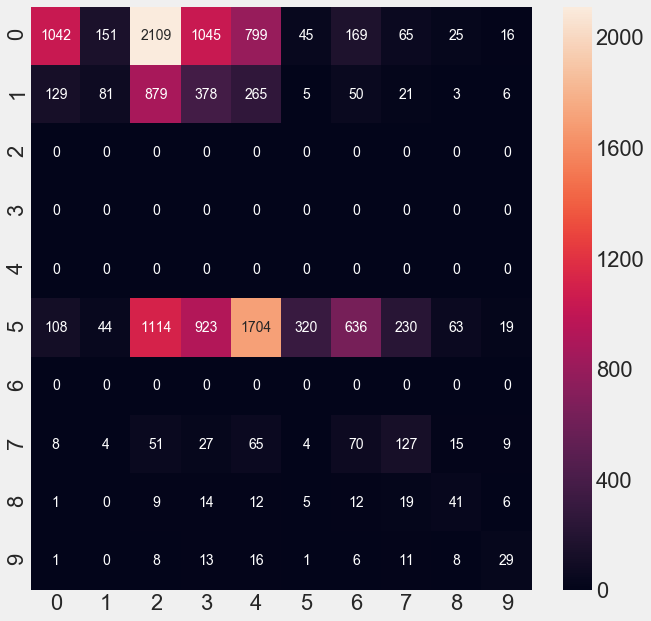

In [177]:
# посмотрим на матрицу ошибок
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt=".0f")

In [178]:
#Просто ужас - некоторые классы вообще не распознаются

### Настройка гиперпараметров модели
может быть удастся за счет настройки повысить шансы на удачную классификацию

In [179]:
clf = DecisionTreeClassifier(random_state=1)
from sklearn.model_selection import GridSearchCV
# сетка поиска Cross Validation - перебор тестовой выборки ровно с одинаковым шагом (к-блочная перекрестная проверка)
params = {"max_depth": np.arange(1,7,1), "min_samples_leaf": range(1,7,1)} # словарь с гиперпараметрами
# настраниваем глубину дерева - max_depth - 1,2,...,6
# и сколько наблюдений в конечном листе - min_samples_lea - 1,2,...,6

In [180]:
grid = GridSearchCV(clf, params, cv = 5, n_jobs = -1)

In [181]:
%%timeit
grid.fit(x_train, y_train) # обучение на кросс-валидации

1min 21s ± 12.4 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [182]:
grid.best_params_ # параметры лучшей модели

{'max_depth': 6, 'min_samples_leaf': 6}

In [183]:
best_clf = grid.best_estimator_ # лучший алгоритм
# по результатам предыдущего обучения

In [184]:
print(classification_report(y_test, y_pred))

C:\Users\Kidd\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kidd\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kidd\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.81      0.19      0.31      5466
         3.0       0.29      0.04      0.08      1817
         8.0       0.00      0.00      0.00         0
        13.0       0.00      0.00      0.00         0
        18.0       0.00      0.00      0.00         0
        23.0       0.84      0.06      0.12      5161
        28.0       0.00      0.00      0.00         0
        33.0       0.27      0.33      0.30       380
        38.0       0.26      0.34      0.30       119
        50.0       0.34      0.31      0.33        93

    accuracy                           0.13     13036
   macro avg       0.28      0.13      0.14     13036
weighted avg       0.73      0.13      0.20     13036



In [185]:
grid.best_score_

0.41774472372818644

#### Анализ результатов примеенения модели "Дерево решений"

Результаты улучшились с 0.12 до 0.41, но все равно плохие
Случайный лес не успею запустить

### Случайный лес

In [188]:
from sklearn.ensemble import RandomForestClassifier

In [189]:
rf_cls = RandomForestClassifier(n_estimators=300, random_state = 1)
rf_cls.fit(x_train, y_train)

MemoryError: could not allocate 10485760 bytes

In [ ]:
y_pred = rf_cls.predict(x_test)
print(classification_report(y_test, y_pred))

In [ ]:
params = {"n_estimators": [100,200,300]} # словарь с гиперпараметрами
# в случайном лесу важно число деревьев
# max_depth - не надо варьировать, 
# min_saples_leaf - не надо задавать
grid = GridSearchCV(rf_cls, params, cv = 5, n_jobs = -1)
%%timeit
grid.fit(x_train, y_train) # обучение на кросс-валидации

In [ ]:
grid.best_params_ # параметры лучшей модели

In [ ]:
best_clf = grid.best_estimator_ # лучший алгоритм
y_pred = best_clf.predict(x_test)
print(classification_report(y_test, y_pred))

In [ ]:
grid.best_score_

In [ ]:
#### Анализ результатов примеенения модели "Случайный лес"

 с преобразованием даты из строки в тип дата не знаком, поэтому закодирвал как и все отсальные номинальные признаки

# Сессия 3 - Восстановление регрессии

In [54]:
df.isna().sum()

id                        0
type                      0
sub_type                  0
start_date                0
end_date             137189
listing_type              0
tom                       0
building_age          27390
total_floor_count     28021
floor_no              59419
room_count                0
size                 146006
address                   0
heating_type          27970
price                   715
price_currency          715
dtype: int64

In [93]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
id,403487.0,201744.000000,1.164768e+05,1.0,100872.5,201744.0,302615.5,4.034870e+05
listing_type,403487.0,1.294235,4.677333e-01,1.0,1.0,1.0,2.0,3.000000e+00
tom,403487.0,57.022739,4.435893e+01,0.0,29.0,40.0,90.0,1.800000e+02
building_age,376097.0,6.943879,8.746804e+00,0.0,0.0,3.0,13.0,5.000000e+01
total_floor_count,375466.0,5.897719,4.432264e+00,1.0,3.0,4.0,6.0,2.500000e+01
size,257481.0,279.349094,9.429195e+03,1.0,85.0,110.0,140.0,9.482350e+05
price,402772.0,354641.661933,4.809503e+06,-250.0,2500.0,199000.0,342000.0,2.000000e+09


In [94]:
df["price"].dropna().sort_values().tail(10)

1319      2.000000e+08
103704    2.500000e+08
328479    2.600000e+08
13209     3.000000e+08
369884    3.100000e+08
371170    3.100000e+08
92930     5.200000e+08
397627    9.999991e+08
7435      1.650000e+09
392156    2.000000e+09
Name: price, dtype: float64

In [95]:
df[df["price"] > 100000].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276183 entries, 1 to 403486
Data columns (total 16 columns):
id                   276183 non-null int64
type                 276183 non-null object
sub_type             276183 non-null object
start_date           276183 non-null object
end_date             176701 non-null object
listing_type         276183 non-null int64
tom                  276183 non-null int64
building_age         260526 non-null float64
total_floor_count    259128 non-null float64
floor_no             232382 non-null object
room_count           276183 non-null object
size                 177976 non-null float64
address              276183 non-null object
heating_type         259256 non-null object
price                276183 non-null float64
price_currency       276183 non-null object
dtypes: float64(4), int64(3), object(9)
memory usage: 26.3+ MB


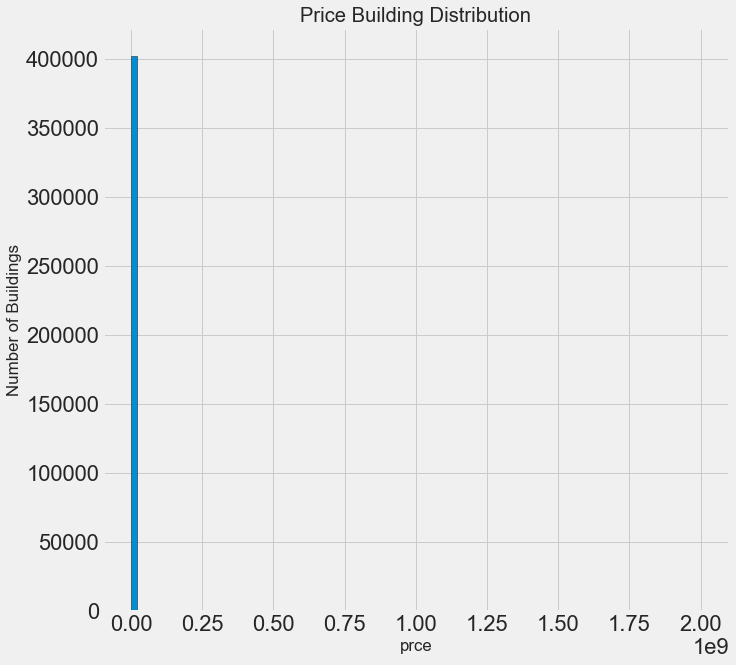

In [96]:
figsize(10, 10)

# Histogram of the Energy Star Score
plt.style.use('fivethirtyeight')
plt.hist(df['price'].dropna(), bins =100, edgecolor = 'k');
plt.xlabel('prce'); plt.ylabel('Number of Buildings'); 
plt.title('Price Building Distribution');

Похоже есть выбросы, если все сосредоточено в 0 

## 3.1 ОТБОР ПРИЗНАКОВ

На переменную цена price обычно влияют такие значения как:
    - sub_type - тип объекта (квартира, вилла, ...) 
    - listing_type - вариант использования (в оригинале Продажа или Рента; а в файле 1,2,3)
    - building_age - возраст здания
    - total_floor_count - количество этажей в здании
    - room_count - количество комнат
    - size - площадь дома/квартиры
    - address - адрес
    - floor_no - номер этажа
    - heating_type - тип отопления, используемый на объекте

Проверим значения признаков по этим характеристикам

In [97]:
df["sub_type"].unique()

array(['Rezidans', 'Daire', 'Villa', 'Müstakil Ev', 'Kooperatif',
       'Yazlık', 'Komple Bina', 'Prefabrik Ev', 'Köşk / Konak / Yalı',
       'Çiftlik Evi', 'Yalı Dairesi', 'Loft'], dtype=object)

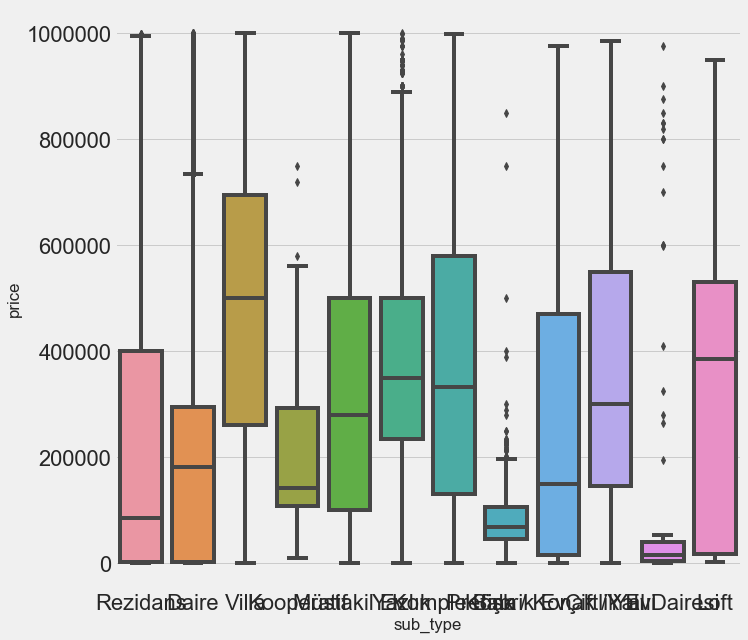

In [98]:
sns.boxplot(data = df[df["price"] < 1000000], y = "price", x = "sub_type")

Для цен на квартиры - все сильно отличается от остальных
Будем проводить исследование только для квартир
Кроме того обрежем значения по цене выше 150 000

In [116]:
df3 = df[df["sub_type"] == "Daire"]
df3

,id,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price,price_currency
1,2,Konut,Daire,2/13/19,NaN,1,14,0.0,25.0,20,1+0,43.0,İstanbul/Kartal/Kordonboyu,air conditioner,490000.0,TRY
2,3,Konut,Daire,10/9/18,11/8/18,1,30,0.0,1.0,1st floor,2+1,NaN,Tekirdağ/Çorlu/Reşadiye,air conditioner,155000.0,TRY
6,7,Konut,Daire,1/4/19,NaN,2,54,0.0,25.0,14,3+1,160.0,İstanbul/Kartal/Kordonboyu,air conditioner,3750.0,TRY
8,9,Konut,Daire,2/16/19,NaN,1,11,NaN,2.0,ground floor,3+1,140.0,Çanakkale/Ayvacık/Küçükkuyu Bld. (Mıhlı),air conditioner,1500000.0,TRY
9,10,Konut,Daire,12/26/18,12/26/18,1,0,3.0,1.0,ground floor,2+2,550.0,İstanbul/Fatih/Sarıdemir,air conditioner,84256.0,GBP
12,13,Konut,Daire,9/13/18,10/13/18,1,30,0.0,3.0,2,2+1,NaN,Aydın/Efeler/Ata,air conditioner,270000.0,TRY
14,15,Konut,Daire,9/22/18,NaN,1,158,3.0,4.0,3,3+1,NaN,Manisa/Turgutlu/Şehitler,air conditioner,75000.0,TRY
17,18,Konut,Daire,12/10/18,1/9/19,2,30,0.0,25.0,20,2+1,84.0,İstanbul/Kartal/Kordonboyu,air conditioner,4200.0,TRY
20,21,Konut,Daire,9/20/18,9/20/18,1,0,3.0,15.0,2,9+2,NaN,Ankara/Çankaya/Karataş,air conditioner,829343.0,TRY
23,24,Konut,Daire,11/23/18,1/14/19,2,52,3.0,15.0,11,2+1,100.0,Mersin/Yenişehir/Afetevler,air conditioner,1100.0,TRY


In [117]:
df3["listing_type"].unique()

array([1, 2, 3], dtype=int64)

In [118]:
df3["building_age"].unique()  # есть nan

array([ 0., nan,  3., 28.,  8., 13., 18., 23., 50., 33., 38.])

In [119]:
df3["total_floor_count"].unique() # есть nan

array([25.,  1.,  2.,  3.,  4., 15.,  5., nan,  9.,  8.,  6.,  7., 10.])

In [120]:
df3["room_count"].unique() 

array(['1+0', '2+1', '3+1', '2+2', '9+2', '1+1', '9+5', '6+3', '4+1',
       '5+1', '9+4', '3+2', '7+2', '8+2', '8+3', '5+2', '10+0', '8+4',
       '6+2', '7+3', '4+2', '7+1', '5+3', '+', '8+1', '6+1', '9+3',
       '10+1', '4+3', '9+1'], dtype=object)

In [121]:
df3["size"].unique() # - есть nan

array([4.30000e+01,         nan, 1.60000e+02, 1.40000e+02, 5.50000e+02,
       8.40000e+01, 1.00000e+02, 3.00000e+01, 9.00000e+01, 6.10000e+01,
       1.20000e+02, 6.00000e+01, 4.80000e+01, 4.00000e+01, 2.26990e+04,
       5.00000e+01, 1.30000e+02, 2.45000e+02, 7.00000e+01, 1.70000e+02,
       6.80000e+01, 1.36000e+02, 1.93000e+02, 1.05000e+02, 3.67331e+05,
       1.57000e+02, 1.35000e+02, 3.50000e+01, 5.80000e+01, 8.50000e+01,
       1.25000e+02, 8.60000e+01, 3.00000e+02, 4.50000e+01, 3.30000e+02,
       1.50000e+02, 2.60000e+02, 1.10000e+02, 2.30000e+01, 3.63679e+05,
       7.50000e+01, 8.00000e+01, 8.70000e+01, 1.11000e+02, 1.75000e+02,
       6.70000e+01, 6.08860e+05, 6.30000e+01, 1.45000e+02, 5.40000e+01,
       2.20000e+02, 8.11910e+04, 1.95148e+05, 2.23000e+02, 1.15000e+02,
       8.60200e+03, 9.50000e+01, 6.50000e+01, 1.85000e+02, 1.08000e+02,
       1.80000e+02, 7.60000e+01, 9.90000e+01, 1.62000e+02, 1.26000e+02,
       7.70000e+01, 8.80000e+01, 1.17000e+02, 1.90000e+02, 1.650

In [122]:
df3["address"].unique() # - есть nan? - надо выделять город?

array(['İstanbul/Kartal/Kordonboyu', 'Tekirdağ/Çorlu/Reşadiye',
       'Çanakkale/Ayvacık/Küçükkuyu Bld. (Mıhlı)', ...,
       'Samsun/Atakum/Çobanözü', 'Denizli/Tavas/Yeni',
       'Balıkesir/Ayvalık/İsmetpaşa'], dtype=object)

In [123]:
df4["floor_no"].unique() # - есть nan? 

array([20, '1st floor', 14, 'ground floor', 2, 3, 11, 16,
       'garden floor flat', nan, 5, 4, 8, 1, 9, 'penthouse apartment', 10,
       6, 7, 13, 18, 15, 12, 17, 19], dtype=object)

In [124]:
df3["heating_type"].unique() # - есть nan? 

array(['air conditioner', 'None', 'central heating/natural gas',
       'central heating/coal', 'combi boiler', 'air-conditioning',
       'gas-combi boiler', 'central heating', 'heating stove/coal',
       'floor heating', 'heating stove/natural gas', 'solar energy',
       'central heating/fuel oil', 'geothermal energy', nan], dtype=object)

In [126]:
df4 = df3[df3["price"] < 150000][["listing_type", "building_age", "total_floor_count", "room_count", "size", "address", "floor_no",
          "heating_type", "price"]]

In [127]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143275 entries, 6 to 403485
Data columns (total 9 columns):
listing_type         143275 non-null int64
building_age         131448 non-null float64
total_floor_count    131737 non-null float64
room_count           143275 non-null object
size                 90439 non-null float64
address              143275 non-null object
floor_no             131656 non-null object
heating_type         131833 non-null object
price                143275 non-null float64
dtypes: float64(4), int64(1), object(4)
memory usage: 8.7+ MB


In [128]:
df4.describe()

,listing_type,building_age,total_floor_count,size,price
count,143275.000000,131448.000000,131737.000000,90439.000000,143275.000000
mean,1.765891,8.832032,5.975231,167.615719,29990.571118
std,0.454326,9.286212,4.185905,5616.555220,51167.890689
min,1.000000,0.000000,1.000000,1.000000,0.000000
25%,2.000000,0.000000,4.000000,77.000000,900.000000
50%,2.000000,3.000000,5.000000,100.000000,1400.000000
75%,2.000000,13.000000,6.000000,125.000000,22000.000000
max,3.000000,50.000000,25.000000,789286.000000,149999.000000


In [129]:
df4['price'].dropna().sort_values().tail(10)

135540    149999.0
151049    149999.0
179285    149999.0
308451    149999.0
175050    149999.0
140723    149999.0
59654     149999.0
332823    149999.0
173514    149999.0
183894    149999.0
Name: price, dtype: float64

In [130]:
df4.isna().sum()

listing_type             0
building_age         11827
total_floor_count    11538
room_count               0
size                 52836
address                  0
floor_no             11619
heating_type         11442
price                    0
dtype: int64

Слишком много неизвестных значений по признаку SIZE - почти 50%

In [134]:
df4['price'].dropna().sort_values().head(10)

354741    0.0
96412     0.0
322060    0.0
93578     0.0
384429    0.0
92916     0.0
91826     0.0
245354    0.0
99224     0.0
397308    0.0
Name: price, dtype: float64

нулевые цены надо исключать 

In [146]:
df5 = df4[df4["price"] > 0]
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143246 entries, 6 to 403485
Data columns (total 9 columns):
listing_type         143246 non-null int64
building_age         131431 non-null float64
total_floor_count    131724 non-null float64
room_count           143246 non-null object
size                 90438 non-null float64
address              143246 non-null object
floor_no             131645 non-null object
heating_type         131808 non-null object
price                143246 non-null float64
dtypes: float64(4), int64(1), object(4)
memory usage: 8.7+ MB


In [147]:
df5.describe().T

,count,mean,std,min,25%,50%,75%,max
listing_type,143246.0,1.765990,0.454274,1.0,2.0,2.0,2.0,3.0
building_age,131431.0,8.832954,9.286316,0.0,0.0,3.0,13.0,50.0
total_floor_count,131724.0,5.975274,4.185991,1.0,4.0,5.0,6.0,25.0
size,90438.0,167.616798,5616.586262,1.0,77.0,100.0,125.0,789286.0
price,143246.0,29996.642678,51171.290348,1.0,900.0,1400.0,22000.0,149999.0


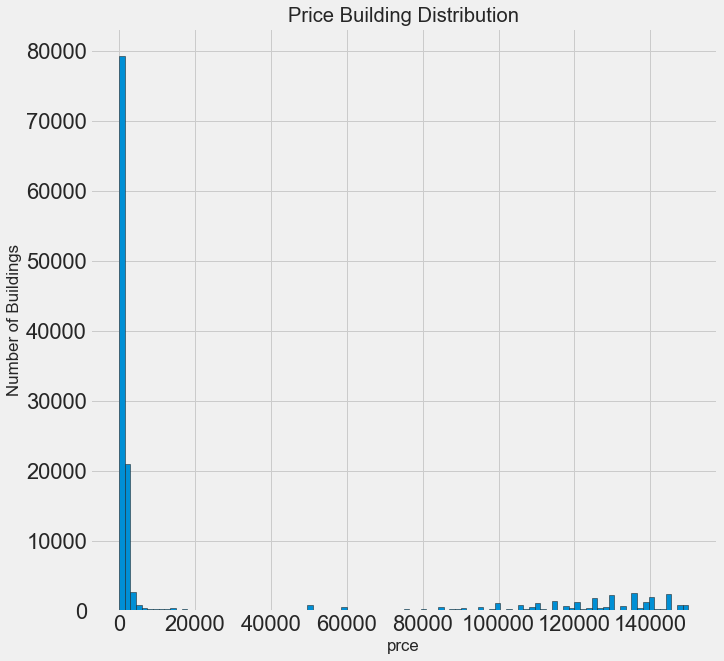

In [148]:
figsize(10, 10)

# Histogram of the Energy Star Score
plt.style.use('fivethirtyeight')
plt.hist(df5['price'].dropna(), bins =100, edgecolor = 'k');
plt.xlabel('prce'); plt.ylabel('Number of Buildings'); 
plt.title('Price Building Distribution');

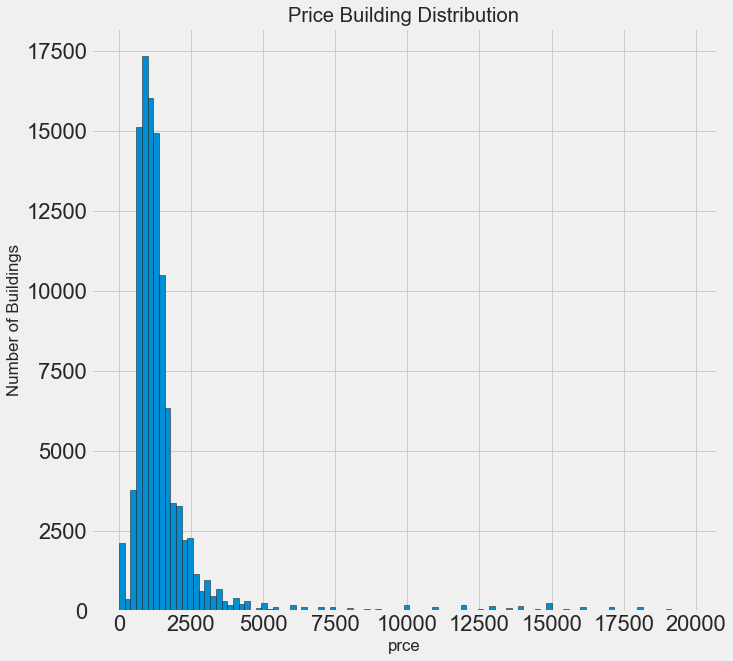

In [149]:
figsize(10, 10)

# Histogram of the Energy Star Score
plt.style.use('fivethirtyeight')
plt.hist(df5[df5["price"] < 20000]['price'].dropna(), bins =100, edgecolor = 'k');
plt.xlabel('prce'); plt.ylabel('Number of Buildings'); 
plt.title('Price Building Distribution');

Сложно поределиться в таком неровном распределении. 
будем пока брать только числовые значения

# Отбросим еще сложные для кодировки параметры

floor_no - берем только числа

room_count - возьмем число комнат без гостиных

In [151]:
d = { '1+0': 1, '1+1': 1, '2+1': 2, '2+2': 2, '3+1': 3, '3+2': 3, '4+1': 4, '4+2': 4, '4+3': 4, 
     '5+1': 5, '5+2': 5, '5+3': 5, '6+1': 6, '6+2': 6, '6+3': 6, '7+1': 7, '7+2': 7, '7+3': 7, 
      '8+1': 8, '8+2': 8, '8+3': 8, '8+4': 8, '9+1': 9, '9+2' :9, '9+3': 9, '9+5': 9, '9+4': 9, 
        '10+0': 10, '+': 0, '10+1': 10}
df5["room_count_N"] = df5["room_count"].map(d) 

C:\Users\Kidd\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [152]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143246 entries, 6 to 403485
Data columns (total 10 columns):
listing_type         143246 non-null int64
building_age         131431 non-null float64
total_floor_count    131724 non-null float64
room_count           143246 non-null object
size                 90438 non-null float64
address              143246 non-null object
floor_no             131645 non-null object
heating_type         131808 non-null object
price                143246 non-null float64
room_count_N         143246 non-null int64
dtypes: float64(4), int64(2), object(4)
memory usage: 9.8+ MB


In [153]:
df5["room_count_N"].value_counts()

2     56603
3     50469
1     26178
4      8118
5      1410
6       228
0       149
7        45
8        20
10       14
9        12
Name: room_count_N, dtype: int64

In [162]:
df5["floor_no"].value_counts()

2                      23979
3                      19108
1                      16118
ground floor           15392
4                      13182
1st floor              10379
garden floor flat       8519
5                       8105
6                       3704
7                       2655
8                       2173
9                       1819
10                      1356
penthouse apartment     1283
11                       986
12                       761
13                       558
20                       416
14                       394
15                       296
16                       184
17                       117
18                       110
19                        51
Name: floor_no, dtype: int64

In [165]:
df5["floor_no"] = df5["floor_no"].replace({"ground floor": -1, "1st floor": 0, "penthouse apartment": 25, "garden floor flat": -2})

C:\Users\Kidd\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [166]:
df5["floor_no"].value_counts()

 2.0     23979
 3.0     19108
 1.0     16118
-1.0     15392
 4.0     13182
 0.0     10379
-2.0      8519
 5.0      8105
 6.0      3704
 7.0      2655
 8.0      2173
 9.0      1819
 10.0     1356
 25.0     1283
 11.0      986
 12.0      761
 13.0      558
 20.0      416
 14.0      394
 15.0      296
 16.0      184
 17.0      117
 18.0      110
 19.0       51
Name: floor_no, dtype: int64

In [171]:
df5.describe().T

,count,mean,std,min,25%,50%,75%,max
listing_type,143246.0,1.765990,0.454274,1.0,2.0,2.0,2.0,3.0
building_age,131431.0,8.832954,9.286316,0.0,0.0,3.0,13.0,50.0
total_floor_count,131724.0,5.975274,4.185991,1.0,4.0,5.0,6.0,25.0
size,90438.0,167.616798,5616.586262,1.0,77.0,100.0,125.0,789286.0
floor_no,131645.0,2.702814,3.937529,-2.0,0.0,2.0,4.0,25.0
price,143246.0,29996.642678,51171.290348,1.0,900.0,1400.0,22000.0,149999.0
room_count_N,143246.0,2.320512,0.894703,0.0,2.0,2.0,3.0,10.0


In [172]:
df_reg = df5[["listing_type", "building_age", "total_floor_count", "size", "floor_no", "price", "room_count_N"]]

In [173]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143246 entries, 6 to 403485
Data columns (total 7 columns):
listing_type         143246 non-null int64
building_age         131431 non-null float64
total_floor_count    131724 non-null float64
size                 90438 non-null float64
floor_no             131645 non-null float64
price                143246 non-null float64
room_count_N         143246 non-null int64
dtypes: float64(5), int64(2)
memory usage: 8.7 MB


In [175]:
# убрали неизвестынй размер
df_reg = df_reg[df_reg["size"].isnull() == False]

In [176]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90438 entries, 6 to 403485
Data columns (total 7 columns):
listing_type         90438 non-null int64
building_age         84822 non-null float64
total_floor_count    85097 non-null float64
size                 90438 non-null float64
floor_no             85257 non-null float64
price                90438 non-null float64
room_count_N         90438 non-null int64
dtypes: float64(5), int64(2)
memory usage: 5.5 MB


In [177]:
# убрали неизвестынй возраст здания
df_reg = df_reg[df_reg["building_age"].isnull() == False]

In [178]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84822 entries, 6 to 401240
Data columns (total 7 columns):
listing_type         84822 non-null int64
building_age         84822 non-null float64
total_floor_count    83418 non-null float64
size                 84822 non-null float64
floor_no             83211 non-null float64
price                84822 non-null float64
room_count_N         84822 non-null int64
dtypes: float64(5), int64(2)
memory usage: 5.2 MB


In [179]:
# убрали неизвестынй этаж
df_reg = df_reg[df_reg["floor_no"].isnull() == False]
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83211 entries, 6 to 388914
Data columns (total 7 columns):
listing_type         83211 non-null int64
building_age         83211 non-null float64
total_floor_count    82148 non-null float64
size                 83211 non-null float64
floor_no             83211 non-null float64
price                83211 non-null float64
room_count_N         83211 non-null int64
dtypes: float64(5), int64(2)
memory usage: 5.1 MB


In [180]:
# убрали неизвестое число этажей
df_reg = df_reg[df_reg["total_floor_count"].isnull() == False]
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82148 entries, 6 to 388914
Data columns (total 7 columns):
listing_type         82148 non-null int64
building_age         82148 non-null float64
total_floor_count    82148 non-null float64
size                 82148 non-null float64
floor_no             82148 non-null float64
price                82148 non-null float64
room_count_N         82148 non-null int64
dtypes: float64(5), int64(2)
memory usage: 5.0 MB


## 3.2 РАЗБИЕНИЕ ДАННЫХ НА ОБУЧАЮЩУЮ И ТЕСТИРУЮЩУЮ ВЫБОРКИ

In [168]:
scal_reg = StandardScaler()

In [181]:
# массив переменных
df5_scal = scal.fit_transform(df_reg.drop(["price", ], axis = 1))
pd.DataFrame(df5_scal, columns=df_reg.drop("price", axis = 1).columns)

,listing_type,building_age,total_floor_count,size,floor_no,room_count_N
0,0.526206,-0.945577,4.472204,-0.000223,2.874113,0.764512
1,-1.659836,-0.622860,-1.190272,0.068913,-0.945832,-0.367443
2,0.526206,-0.945577,4.472204,-0.013695,4.402092,-0.367443
3,0.526206,-0.622860,2.112839,-0.010859,2.110124,-0.367443
4,0.526206,-0.945577,4.472204,-0.023268,3.383439,-1.499397
5,0.526206,-0.945577,4.472204,-0.023268,4.402092,-1.499397
6,0.526206,-0.084997,-0.246526,-0.003768,0.582146,-0.367443
7,0.526206,-0.945577,-0.954335,-0.007314,-0.691169,0.764512
8,0.526206,-0.622860,2.112839,-0.010859,2.110124,-0.367443
9,0.526206,-0.622860,4.472204,-0.007314,4.402092,-0.367443


In [182]:
df5_scal

array([[ 5.26206288e-01, -9.45577174e-01,  4.47220392e+00,
        -2.22755701e-04,  2.87411340e+00,  7.64511548e-01],
       [-1.65983569e+00, -6.22859541e-01, -1.19027185e+00,
         6.89127797e-02, -9.45831864e-01, -3.67442863e-01],
       [ 5.26206288e-01, -9.45577174e-01,  4.47220392e+00,
        -1.36953216e-02,  4.40209151e+00, -3.67442863e-01],
       ...,
       [ 5.26206288e-01, -6.22859541e-01, -4.82462379e-01,
        -1.52907570e-02, -4.36505829e-01, -3.67442863e-01],
       [ 5.26206288e-01, -6.22859541e-01, -7.18398869e-01,
        -9.08628588e-03, -4.36505829e-01,  7.64511548e-01],
       [ 5.26206288e-01,  4.43305004e+00, -7.18398869e-01,
        -5.54087381e-03, -9.45831864e-01,  7.64511548e-01]])

In [183]:
x = df5_scal.copy() # копирует массив в x
y = df_reg["price"] # целевая переменная y

In [187]:
# сложно распределенная величина PRICE - выборку разбиваем случайно - у PRICE слишком много значений
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

## 3.3 ПРОГНОЗИРОВАНИЕ

Выберем линейную модель регрессии - на первый пробный вариант

In [200]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(x_train, y_train)
# что предскажет на обучающей выборке
y_train_pred = slr.predict(x_train)

In [201]:
# точность на обучающей 
slr.score(x_train, y_train_pred) 

1.0

In [203]:
# точность на тестовой 
slr.score(x_test, y_test)

0.8723242405949708

In [208]:
# предсказали значения
y_test_pred = slr.predict(x_test)

In [209]:
from sklearn.metrics import mean_squared_error, r2_score

In [210]:
mean_squared_error(y_test, y_pred)

343987589.68696415

In [211]:
r2_score(y_test, y_pred)

0.8723242405949708

неплохо получилось, хотя средняя квадратическая ошибка - очень большая

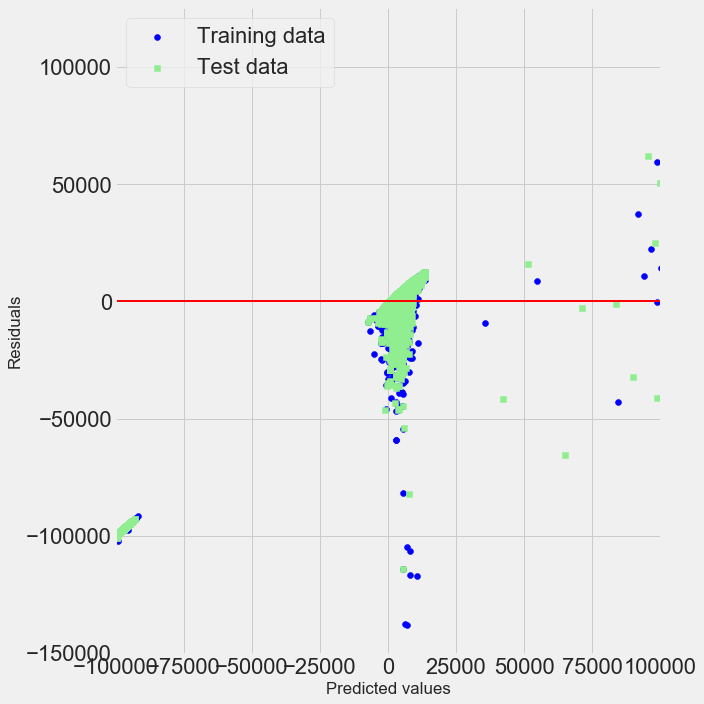

In [215]:
# возьмем и построим график завимости отклонения от предсказанных значений 
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-100000, xmax=100000, lw=2, color='red')
plt.xlim([-100000, 100000])
plt.tight_layout()

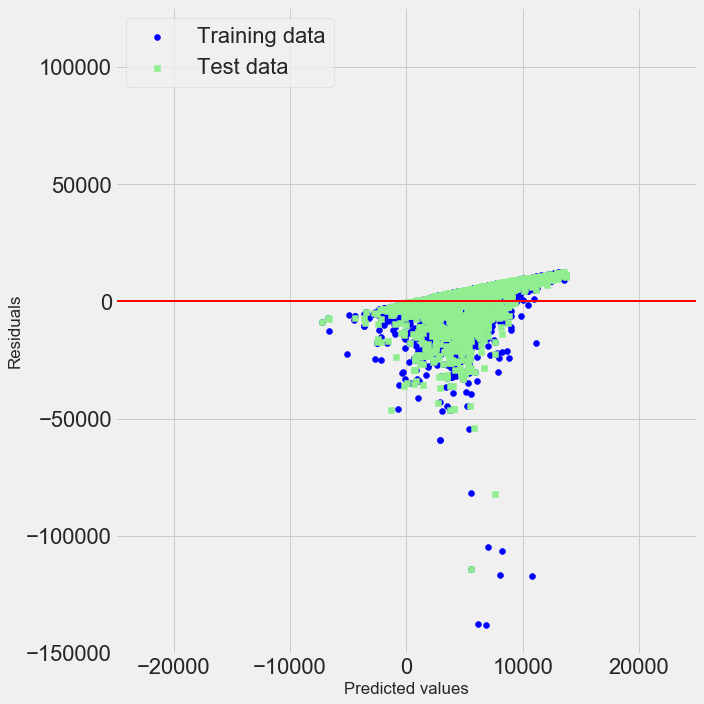

In [216]:
# возьмеме интервал от -25000 до 25000 - там много значений из выборки
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-25000, xmax=25000, lw=2, color='red')
plt.xlim([-25000, 25000])
plt.tight_layout()